In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from sklearn.metrics import confusion_matrix
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# load the data 

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

In [4]:
# split data into train and validation

# Scale the data
x_train = x_train.astype('float32') / 255.0
x_test =x_test.astype('float32') / 255.0

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
# build the model 

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(partial_x_train, partial_y_train, batch_size)

In [7]:
#  train the model using data augmentation and dropout:

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=(x_test, y_test))


Epoch 1/30
100/100 [==============================] - 5s 53ms/step - loss: 2.2870 - acc: 0.1231 - val_loss: 2.2463 - val_acc: 0.1169
Epoch 2/30
100/100 [==============================] - 6s 57ms/step - loss: 2.1822 - acc: 0.1966 - val_loss: 2.0775 - val_acc: 0.2596
Epoch 3/30
100/100 [==============================] - 6s 63ms/step - loss: 2.0680 - acc: 0.2325 - val_loss: 1.9812 - val_acc: 0.2553
Epoch 4/30
100/100 [==============================] - 6s 60ms/step - loss: 2.0063 - acc: 0.2597 - val_loss: 1.9498 - val_acc: 0.2763
Epoch 5/30
100/100 [==============================] - 6s 60ms/step - loss: 1.9524 - acc: 0.2753 - val_loss: 1.8585 - val_acc: 0.3144
Epoch 6/30
100/100 [==============================] - 6s 61ms/step - loss: 1.9011 - acc: 0.3006 - val_loss: 1.8118 - val_acc: 0.3371
Epoch 7/30
100/100 [==============================] - 6s 59ms/step - loss: 1.8757 - acc: 0.3209 - val_loss: 1.7986 - val_acc: 0.3492
Epoch 8/30
100/100 [==============================] - 6s 60ms/step - 

In [8]:
#  save the model

model.save('cnn_classifier_2.h5')

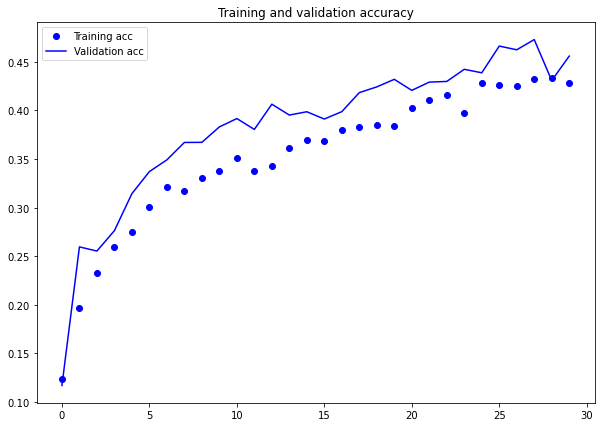

<Figure size 432x288 with 0 Axes>

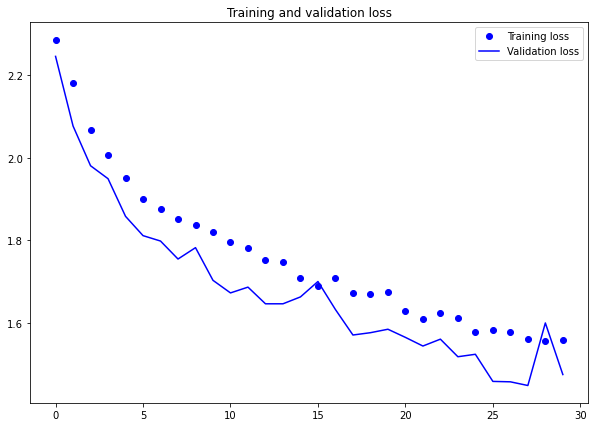

In [9]:
# Plot the training vs validation - accuracy and loss

plt.figure(figsize=(10,7))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

In [10]:
results = model.evaluate(x_test, y_test)

print(f"The accuracy of the model is {round(results[1],2)*100}%")

313/313 [==============================] - 3s 8ms/step - loss: 1.4751 - acc: 0.4560
The accuracy of the model is 46.0%


In [11]:
# Predicting test data

y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [12]:
# reverse y_test from categorical 

y_test = np.argmax(y_test,axis=1)

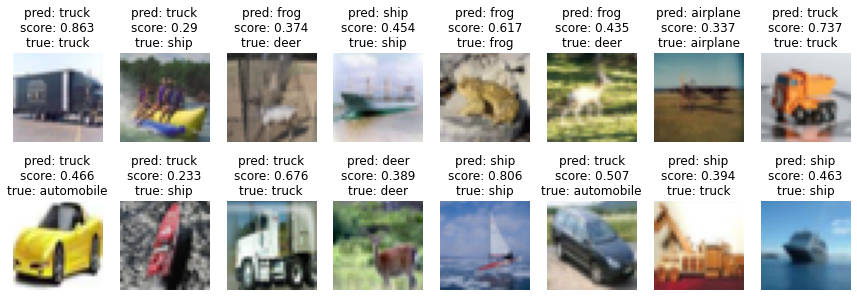

In [13]:
# display the predictions

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show();